FROM:
https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/Keyword%20Extraction%20with%20TF-IDF%20and%20SKlearn.ipynb

In [32]:
import re
import pandas as pd
file= 'data/cleaned_hankgreen_50000_m1.csv'
df_idf = pd.read_csv('data/cleaned_SenSanders_23400_m1.csv')
# print(df_idf)

import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

# twts_new = []
# for tweet in df_idf["Tweets"].values:
#     twts_new.append(pre_process(tweet))
# df_idf['text'] = twts_new

df_idf['text'] = df_idf['Tweets'].apply(lambda x:pre_process(x))
#show the first 'text'
print(df_idf['text'][2])


the idea of a minimum wage was once considered radical not all that long ago and yet it is now widely considered a bedrock of our nation 


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# print(stopwords.words('english'))

#load a set of stop words
stopwords=stopwords.words('english')
#get the text column 
docs=df_idf['text'].tolist()
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(docs)
list(cv.vocabulary_.keys())[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'df_idf' is not defined

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# read test docs into a dataframe and concatenate title and body
df_test= pd.read_csv('data/cleaned_SenSanders_23400_m1.csv')
# df_test['text'] = df_test['title'] + df_test['body']
df_test['text'] =df_test['Tweets'].apply(lambda x:pre_process(x))
# get test docs into a list
docs_test=df_test['text'].tolist()


def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results







In [66]:
# you only needs to do this once
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
doc=docs_test[4]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

k = "pain"
val = nltk.pos_tag([k])[0][1]
print("Is noun",val == 'NN' or val == 'NNS' or val == 'NNPS' or val == 'NNP')

# import required modules
import nltk
nltk.download('averaged_perceptron_tagger')
  
for k in keywords:
    val = nltk.pos_tag([k])[0][1]
    if (val == 'NN' or val == 'NNS' or val == 'NNPS' or val == 'NNP'):
        print(k,keywords[k])
    else:
        print("BADWORD",k)

Is noun True
equalityact 0.382
representatives 0.315
treatment 0.283
BADWORD regardless
love 0.278
side 0.268
BADWORD equal
congratulations 0.259
deserve 0.245
BADWORD voted


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [72]:
min_len = 1000000
for i in range(len(docs_test)):
    # you only needs to do this once
    feature_names=cv.get_feature_names()

    # get the document that we want to extract keywords from
    doc=docs_test[i]

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,2)
    a = 0
    for k in keywords:
        a+=1
    min_len = min(a,min_len)


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NameError: name 's' is not defined

<class 'list'>


In [2]:
from api.tfidf_funcs import tfidf, get_Keywords
import pandas as pd
df = pd.read_csv('data/cleaned_SenSanders_23400_m1.csv')
keywords = []
cv, tfidf_transformer = tfidf(df)
for tweet in df['Tweets'].tolist():
    keywords.append(get_Keywords(cv, tfidf_transformer,tweet))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


4956it [00:00, 8325.36it/s]


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/4956 utterances processed
2000/4956 utterances processed
3000/4956 utterances processed
4000/4956 utterances processed
4956/4956 utterances processed
Initialized default classification model (standard scaled logistic regression).


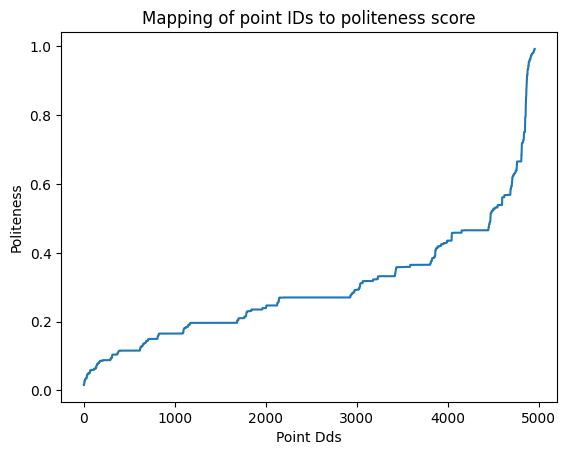

In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import convokit
from convokit import Corpus, Speaker, Utterance
from convokit import TextParser
from convokit import download
from pandas import DataFrame
from typing import List, Dict, Set
import random
from sklearn import svm
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from convokit import Classifier
from convokit import PolitenessStrategies
import matplotlib
import matplotlib.pyplot as plt
df_in = pd.read_csv('data/cleaned_SenSanders_5000_m1.csv')

corpus_train = 'wikipedia' 
polite_percent=0.75
impolite_percent=0.5
"""
This function uses the stanford politeness corpus to train a logistic regression model to sort polite and impolite tweets

Inputs:
df_in, Pandas Dataframe: Containing one column named 'Tweets' with text data
corpus_train, str: Choice of corpus to use as training. Either 'wikipedia' or 'stack-exchange'
percentage_top_tweets, float: percentage of highest rated polite or impolite tweets
polite_or_impolite, str: 'polite' or 'impolite'. Choice to return most polite or most impolite

returns a pandas df with the top percentage_top_tweets % of polite or impolite tweets

"""
# Downloading the wikipedia portion of annotated data
if corpus_train == 'wikipedia': #default
    wiki_corpus = Corpus(download("wikipedia-politeness-corpus")) #other options is stack-exchange-politeness-corpus
if corpus_train =='stack-exchange':
    wiki_corpus = Corpus(download("stack-exchange-politeness-corpus")) 

df_in = df_in #
name = 'Tweeter'
df = pd.DataFrame(columns=['id','speaker','conversation_id','reply_to','timestamp','text'])
id_col = list(range(len(df_in)))
speaker_col = [name]*len(df_in)
conversation_col = list(range(len(df_in)))
reply_col = ['self']*len(df_in)
time_col = [0]*len(df_in)
text_col = df_in["Tweets"]

df['id'] = id_col
df['speaker'] = speaker_col
df['conversation_id'] = conversation_col
df['reply_to'] = reply_col
df['timestamp'] = time_col
df['text'] = text_col
test_corp = Corpus.from_pandas(df)


parser = TextParser(verbosity=1000)
#parse train and test. We use wiki_corpus. We can change this by alftering the first line in this function
wiki_corpus = parser.transform(wiki_corpus)
test_corp = parser.transform(test_corp)
ps = PolitenessStrategies()
wiki_corpus = ps.transform(wiki_corpus, markers=True)
test_corp = ps.transform(test_corp, markers=True)


binary_corpus = Corpus(utterances=[utt for utt in wiki_corpus.iter_utterances() if utt.meta["Binary"] != 0])
#training
# clf_cv = Classifier(obj_type="utterance", 
#                     pred_feats=["politeness_strategies"], 
#                     labeller=lambda utt: utt.meta['Binary'] == 1)

# clf_cv.evaluate_with_cv(binary_corpus)

#Now I just use old train test split approach:
# clf_split = Classifier(obj_type="utterance", 
#                     pred_feats=["politeness_strategies"], 
#                     labeller=lambda utt: utt.meta['Binary'] == 1)

# clf_split.evaluate_with_train_test_split(binary_corpus)
# test_ids = binary_corpus.get_utterance_ids()[-100:]
train_corpus = Corpus(utterances=[utt for utt in binary_corpus.iter_utterances()]) #note I just make this all points hahahah - Andrew
# test_corpus = Corpus(utterances=[utt for utt in binary_corpus.iter_utterances() if utt.id in test_ids])
clf = Classifier(obj_type="utterance", 
                    pred_feats=["politeness_strategies"], 
                    labeller=lambda utt: utt.meta['Binary'] == 1)
clf.fit(train_corpus)

test_pred = clf.transform(test_corp)

scores = clf.summarize(test_pred) # df
x = scores['pred_score'].tolist()
plt.ylabel('Politeness')
plt.xlabel('Point Dds')
plt.title('Mapping of point IDs to politeness score')
plt.plot(x)
    

In [12]:

#XX TESTED 12/10/2022
df_pos = pd.DataFrame(columns=["Tweets"])
df_neg = pd.DataFrame(columns=["Tweets"])
df_neutral = pd.DataFrame(columns=["Tweets"])

#Polite
choices = scores.loc[scores['prediction']==1] #get all points with polite prediction
choices = choices.reset_index()
choice_ids = choices['id']
end_index = len(choice_ids)//(1/polite_percent)

output = [] #list of tweets. Will append this to a df and return that df in the end
for i in range(0,int(end_index)):
    id = choice_ids[i] #get id for point
    loc = df.loc[df['id']==int(id)]
    output.append(loc['text'].tolist()[0])
df_out = pd.DataFrame(columns=["Tweets"])
df_out["Tweets"] = output
df_pos = df_out.copy()

#Neutral
output = []
df_neutral = pd.DataFrame(columns=["Tweets"])
for i in range(int(end_index),len(choices)):
    id = choice_ids[i] #get id for point
    loc = df.loc[df['id']==int(id)]
    output.append(loc['text'].tolist()[0])
df_neutral["Tweets"] = output
print(df_neutral)




                                                Tweets
0    You will forgive me for not having a lot of pa...
1    Whether America's climate-action plan is 1,000...
2    For those who say the budget framework I propo...
3    I’ve heard Senator Manchin talk about not want...
4    This is the beginning of a bipartisan process ...
..                                                 ...
117  Thank you to the over 900 Vermonters who joine...
118  At a time of exploding profits, I would hope t...
119  Let me say this to all the survivors out there...
120  Thank you @WCHospital for your hospitality. I ...
121  I want to thank my colleagues and the many peo...

[122 rows x 1 columns]


In [34]:

    
#neg
choices = scores.loc[scores['prediction']==0] #get all points that are rude :(
choices = choices.reset_index()
choice_ids = choices['id']
choice_ids = choice_ids[::-1] #reverse so the rudes are on top
end_index = len(choice_ids)//(1/impolite_percent) #stop point
output = [] #list of tweets. Will append this to a df and return that df in the end
for i in range(0,int(end_index)):
    id = choice_ids[i] #get id for point
    loc = df.loc[df['id']==int(id)]
    output.append(loc['text'].tolist()[0])
df_out2 = pd.DataFrame(columns=["Tweets"])
df_out2["Tweets"] = output
df_neg = df_out2.copy()

#Neutral
output = []
df_neutral2 =pd.DataFrame(columns=["Tweets"])
for i in range(int(end_index),len(choices)):
    id = choice_ids[i] #get id for point
    loc = df.loc[df['id']==int(id)]
    output.append(loc['text'].tolist()[0])
df_neutral2["Tweets"] = output


vals1 = df_neutral["Tweets"].values.tolist()
vals2 = df_neutral2["Tweets"].values.tolist()
# print(vals1,vals2)
df_neutral3 = pd.DataFrame(columns=["Tweets"])
df_neutral3["Tweets"] = vals1+vals2 #Return this one

In [35]:
print(df_neutral3)


                                                 Tweets
0     You will forgive me for not having a lot of pa...
1     Whether America's climate-action plan is 1,000...
2     For those who say the budget framework I propo...
3     I’ve heard Senator Manchin talk about not want...
4     This is the beginning of a bipartisan process ...
...                                                 ...
2352  Congratulations to UVM Medical Center resident...
2353  I know you might be shocked to hear this, but ...
2354  The White House sent us their talking points a...
2355  If Rob Walton, a key owner of Walmart, can aff...
2356  Here's how rigged the tax code is:. . If you m...

[2357 rows x 1 columns]
